


# Lab Course Machine Learning
# Exercise Sheet 7
December 22th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 0: Dataset Preprocessing

In [336]:
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from scipy.spatial.distance import pdist,cdist
warnings.filterwarnings('ignore')

### Reading datasets from archive

In [337]:
# for checking which dataset in dataset dictionary has missing values
def getNanDatasets(dataDict):
    nanDatasets = []
    for key in dataDict:

        data = np.array(dataDict.get(key))
        is_null = False
        for i in data:
            array_sum = np.sum(i)
            # if sum is null then array as null values
            array_has_nan = np.isnan(array_sum)
            if(array_has_nan):
                is_null = True
        
        if(is_null):
            nanDatasets.append(key) # appending into list of dataset having missing values
    return nanDatasets


Below functions is used for getting dataframe from archive folders and merging train and test splits and finally creating a dictionary of all datasets.

In [338]:
def getDataframes(dir):
    dataFramesDict ={}

    for dirpath,_,filenames in os.walk(dir):
        if(len(filenames)>0):
            
            train = [f for f in filenames if "TRAIN" in f] # getting train file from folder
            test = [f for f in filenames if "TEST" in f] # getting test file from folder
            if(len(train)>0 and len(test)>0): 

                key = train[0].split('_')[0] # for the name of dataset
                
                #Train
                absPathTrain = os.path.abspath(os.path.join(dirpath, train[0])) # for complete refrence of filepath
                dfTrain = pd.read_csv(absPathTrain,sep='\t',header=None)
                
                #Test
                absPathTest = os.path.abspath(os.path.join(dirpath, test[0])) # for complete refrence of filepath
                dfTest = pd.read_csv(absPathTest,sep='\t',header=None)
                
                df = pd.concat([dfTrain,dfTest],ignore_index=True) # merging train and test dataframes
                
                df = df.rename(columns={0: "Y"})
    

                #nomralizing              
                df.loc[:, df.columns != 'Y'] = (df.loc[:, df.columns != 'Y']-df.loc[:, df.columns != 'Y'].mean())/df.loc[:, df.columns != 'Y'].std()
                



                dataFramesDict[key] = df
    return dataFramesDict

In [339]:
dframesDict = getDataframes('Dataset')


### 2. Preprocess the datasets

In [340]:
nullDatasets=[]
for key in dframesDict:
    df= dframesDict.get(key)
    
    if (df.isnull().values.any()):
        nullDatasets.append(key)

Datasets with missing values.

In [341]:
nullDatasets

['AllGestureWiimoteX',
 'AllGestureWiimoteY',
 'AllGestureWiimoteZ',
 'DodgerLoopDay',
 'DodgerLoopGame',
 'DodgerLoopWeekend',
 'GestureMidAirD1',
 'GestureMidAirD2',
 'GestureMidAirD3',
 'GesturePebbleZ1',
 'GesturePebbleZ2',
 'MelbournePedestrian',
 'PickupGestureWiimoteZ',
 'PLAID',
 'ShakeGestureWiimoteZ']

Some timeseries in datasets have not equal lenght and has NAN in the end of rows. for these we have to pad zeros in .So i traveresed each row from end and until i found nan i replaced it with zeros.

In [342]:
def paddingDataset(datasetDict):
    paddDict =dict()
    for key in datasetDict:
        dataset = datasetDict.get(key).to_numpy()
        indRow=0

        for row in dataset:
            for i, v in reversed(list(enumerate(row))): # traversing from last index and replacing NAN with zeros
                if(np.isnan(v)):
                    dataset[indRow][i]=0

                else:
                    break # coming out of loop when finding non- null value

            indRow += 1
        
        paddDict.update({key: dataset})
    
    return paddDict    
    

In [347]:
paddedDict = paddingDataset(dframesDict.copy())


###  Plot interesting statistics:

In [344]:
# for cmap values in range
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#### length of samples

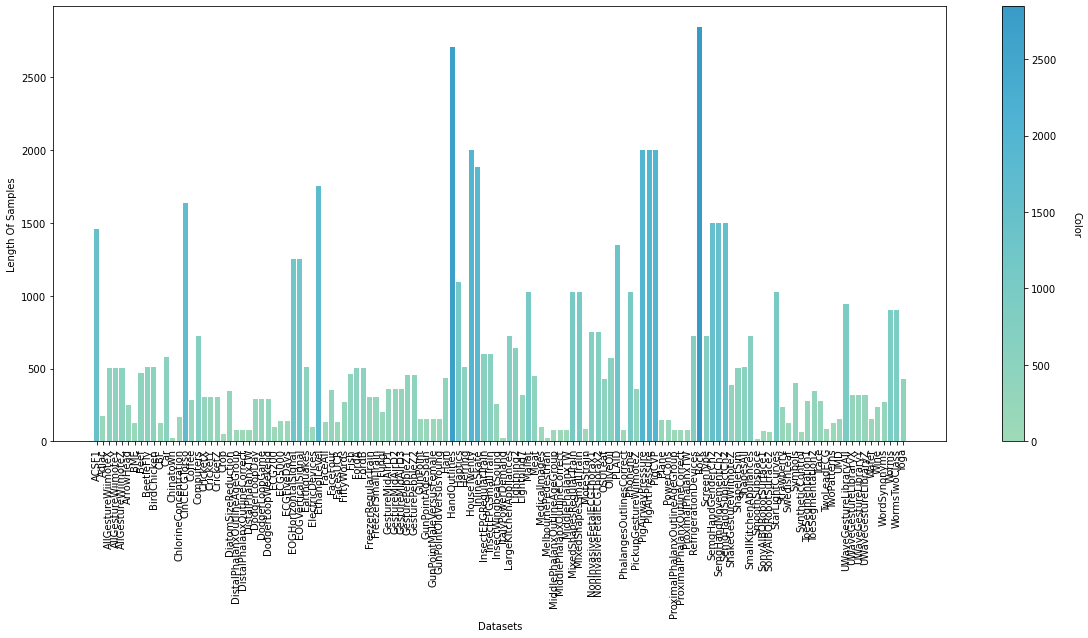

In [352]:
sampleDict ={}
for key in dframesDict:
    data = dframesDict.get(key)
    sampleDict.update({key:len(data.columns)})
    
lists = sorted(sampleDict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure(figsize=(20,8))
ax = plt.axes()

# Refrence for colormap :https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/ ,https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
data_hight_normalized = [x / max(y) for x in y]
my_cmap = plt.cm.get_cmap('GnBu')
new_cmap1 = truncate_colormap(my_cmap.copy(), 0.4, 0.7)
colorsMap = new_cmap1(data_hight_normalized)
sm = ScalarMappable(cmap=new_cmap1, norm=plt.Normalize(0,max(y)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

ax.bar(x, y,color=colorsMap)
ax.set_xlabel('Datasets')
ax.set_ylabel('Length Of Samples')
plt.xticks(rotation=90)
plt.show()

#### Number of samples

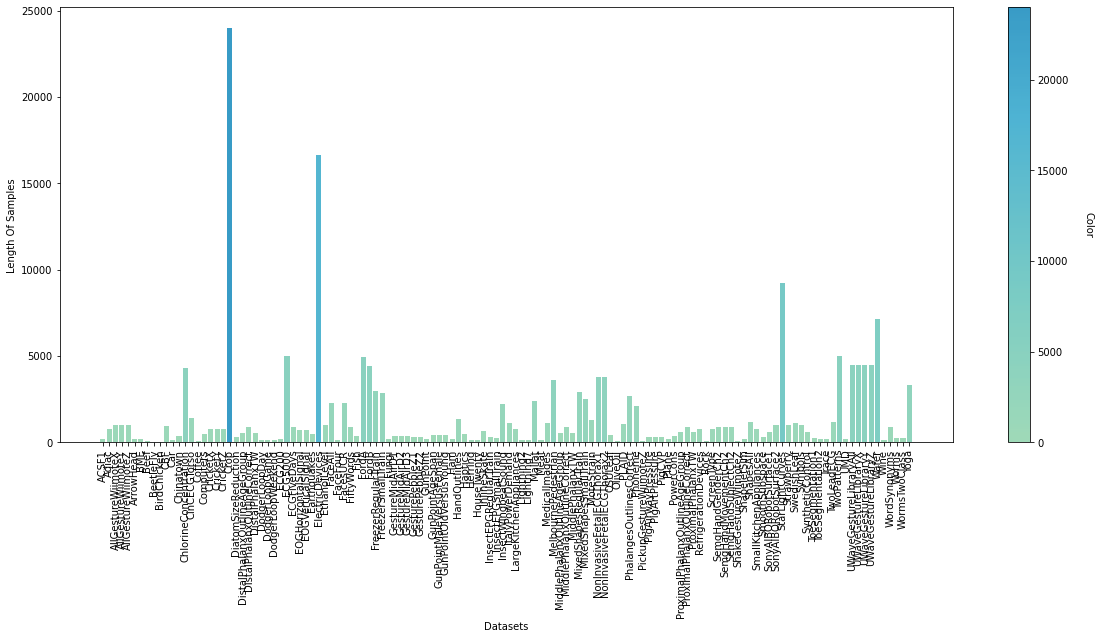

In [353]:
sampleDict ={}
for key in dframesDict:
    data = dframesDict.get(key)
    sampleDict.update({key:len(data)})
    
lists = sorted(sampleDict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure(figsize=(20,8))
ax = plt.axes()

# Refrence for colormap :https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/ ,https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
data_hight_normalized = [x / max(y) for x in y]
my_cmap = plt.cm.get_cmap('GnBu')
new_cmap1 = truncate_colormap(my_cmap.copy(), 0.4, 0.7)
colorsMap = new_cmap1(data_hight_normalized)
sm = ScalarMappable(cmap=new_cmap1, norm=plt.Normalize(0,max(y)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

ax.bar(x, y,color=colorsMap)
ax.set_xlabel('Datasets')
ax.set_ylabel('Length Of Samples')
plt.xticks(rotation=90)
plt.show()

#### Number of classes

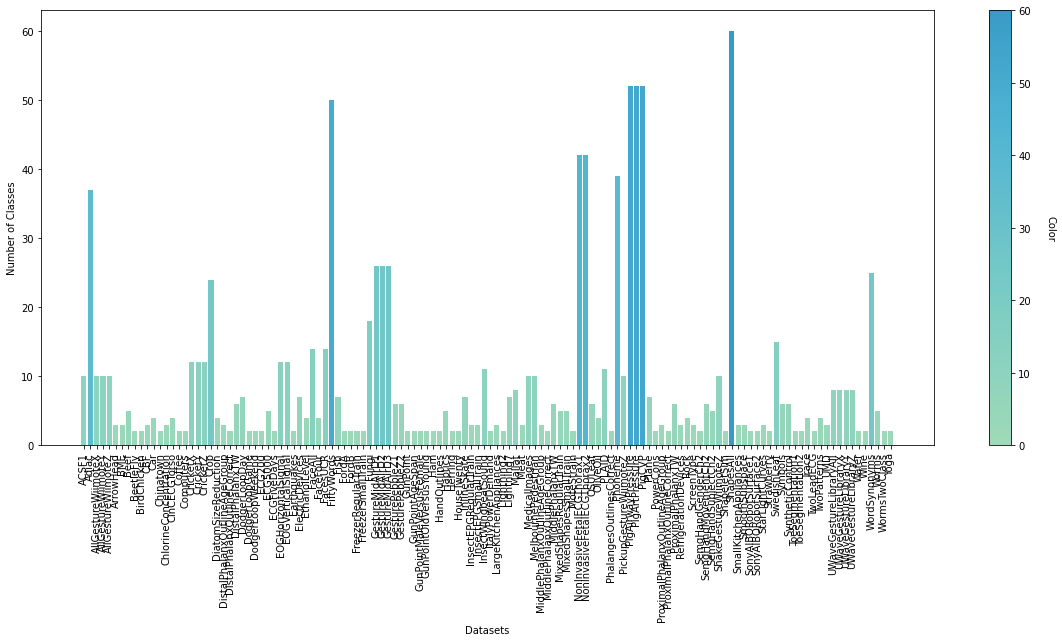

In [354]:
classDict ={}
for key in dframesDict:
    d = dframesDict.get(key)
    d = d.rename(columns={0: "Y"}) # renaming
    classes = (d['Y'].unique())
    classDict.update({key:len(classes)})


lists = sorted(classDict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
# Refrence for colormap :https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/ ,https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
data_hight_normalized = [x / max(y) for x in y]
my_cmap = plt.cm.get_cmap('GnBu')
new_cmap1 = truncate_colormap(my_cmap.copy(), 0.4, 0.7)
colorsMap = new_cmap1(data_hight_normalized)

sm = ScalarMappable(cmap=new_cmap1, norm=plt.Normalize(0,max(y)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

ax.bar(x, y,color=colorsMap)
ax.set_xlabel('Datasets')
ax.set_ylabel('Number of Classes')
plt.xticks(rotation=90)
plt.show()

### Exercise 1: Dataset Imputation with KNN


### 1. List the datasets having missing values.

In [355]:
nanDatasets = getNanDatasets(paddedDict)
nanDatasets

['AllGestureWiimoteY',
 'DodgerLoopDay',
 'DodgerLoopGame',
 'DodgerLoopWeekend',
 'MelbournePedestrian',
 'PickupGestureWiimoteZ',
 'ShakeGestureWiimoteZ']

### 2. For each dataset with missing values, and for each feature (timestep) of it that has missing values impute the value by calculating the mean of its nearest K neighbors.

In [356]:
# Euclidian distance between two samples
def ecludianDistance (X,Y):
    s_sum = 0.0
    counter = np.count_nonzero(~np.isnan(X))
    for x, y in zip(X, Y):
        if ~(np.isnan(x) or np.isnan(y)):  # for missing values
            s_sum += (x - y) ** 2      
            
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html
    # using same logic as sklearn.metrics.pairwise.nan_euclidean_distances for missing values
    
    return np.sqrt(s_sum*(len(X)/counter))

kNearestNeighbours() takes a dataset with missing values and impute the missing values. First it calculates n twoDimension index of missing values in orignal matrix. Then it puts all missing columns values for a row in dict with key as row number.Now we iterate through this dict, calculate distance for each key in dictionary which is row and impute each col index which is stored in value of dict. For k nearest neighbours takes values for that column index average them and impute in the missing column for that row. Repeat the process for all rows. 

In [357]:
def kNearestNeighbours(k,X_null):
    X=X_null
    r,c= X.shape
    # indices of all NAN in array
    indicesDict = dict()
    indexNan = np.argwhere(np.isnan(X))
    
    for i in indexNan:
        if i[0] not in indicesDict:
            indList = []
            indList.append(i[1])
            indicesDict.update({i[0]:indList})
        else:
            indList = indicesDict[i[0]]
            indList.append(i[1])
            indicesDict.update({i[0]:indList})
        
        
    # for all nan indices
    for key in indicesDict:

        col = indicesDict[key]
        distInd= []
        nanRow = X[key]
        
        # calculating k nearest rows for each row
        for j in range(r):
            if(key!=j): #to ignore distance from self
                dist = ecludianDistance(nanRow,X[j])
                distInd.append([int(j),dist])
        distInd = np.array(distInd)
        sortedDist = distInd[distInd[:,1].argsort()]
        
        # for each missing value in that row, finding average of nearest rows for that timestamp
        for c in col:
            sum = 0
            for j in range(k):
                if ~(np.isnan(X[int(sortedDist[j][0])][c])):
                    sum = sum + X[int(sortedDist[j][0])][c]
            average = sum / k

            X[key][c] = average
            
               
    return X



In [359]:
def transformNan(dataDic,k): # calling kNearestNeighbours for every dataset with missing value
    dfDict = dataDic
    listOfNanDatasets = getNanDatasets(dataDic) 
    for d in listOfNanDatasets:
        data =dataDic.get(d)
        listDf = []
        array_sum = np.sum(data)
        array_has_nan = np.isnan(array_sum)
        
        if (array_has_nan):
            X = kNearestNeighbours(k,data.copy())
            dfDict.update({d:X })
    return dfDict
    

In [360]:
finalDict = transformNan(paddedDict.copy(),5)

After imputaion, we get no dataset with missing values.

In [379]:
nanDatasets = getNanDatasets(finalDict) 
nanDatasets

[]

### 3. Next, train a K-Nearest Neighbour classifier (pseudo-code given in slides) with majority voting and euclidean distance to maximize accuracy on the validation split by tuning K via grid search.

For this part, we need to split the dataset into train, validation and test according to given ratios of 0.7,0.15,0.15 respectively.

In [ ]:
def splitDataframes(npArray):
    train, valid, test = 0.7, 0.15, 0.15

    d = pd.DataFrame(npArray)
    d = d.rename(columns={0: "Y"})

    data_train  = []
    data_valid  = []
    data_test   = []
#         np.unique(a, axis=0)
    classes = (d['Y'].unique())

    for c in classes:

        rowsWithc = d[d.Y == c]
        if(len(data_train)>0):
            data_train = np.concatenate((data_train, rowsWithc[0:math.floor(len(rowsWithc)*0.7)].to_numpy()), axis=0)
        else:
            data_train = rowsWithc[0:math.floor(len(rowsWithc)*0.7)].to_numpy()
        if (len(data_valid)>0):
            data_valid = np.concatenate((data_valid, rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)].to_numpy()), axis=0)
        else:
            data_valid = rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)].to_numpy()
        if (len(data_test)>0):
            data_test = np.concatenate((data_test, rowsWithc[math.floor(len(rowsWithc)*0.85):].to_numpy()), axis=0)
        else:
            data_test = rowsWithc[math.floor(len(rowsWithc)*0.85):].to_numpy()
    
        
    return np.array(data_train),np.array(data_valid),np.array(data_test)
        

In [ ]:
splitDict = dict()
for key in finalDict:
    valueList =[]
    data_train,data_valid,data_test = splitDataframes(finalDict.get(key).copy())
    valueList.append((data_train))
    valueList.append((data_valid))
    valueList.append((data_test))
    splitDict.update({key: valueList})

In [378]:
nanDatasets = getNanDatasets(splitDict)
nanDatasets


[]

kNearestNeighboursClassifier() takes train data and validation data splits for each dataset. For each validation point calculates its distance for each training points and for k closest training points check with majority prediction for those points and assign it as predicted value and compute accuracy.

In [ ]:
def kNearestNeighboursClassifier(k,trainData,validationData):
    r,c= validationData.shape
    count =0
    for v in validationData:
        distInd= []
        ind =0 
        for t in trainData:
            dist = ecludianDistance(v[1:],t[1:])
            distInd.append([int(ind),dist])
            ind += 1
        distInd = np.array(distInd)    
        sortedDist = distInd[distInd[:,1].argsort()]
        predList = []
        
        for j in range(k):
            predList.append(trainData[int(sortedDist[j][0])][0])
        vPredict = (max(predList,key=predList.count))
        if(vPredict == v[0]):
            count+=1
    accuracy = (count/r)*100
    
    return (accuracy)    


In [367]:
def kTuningClassifier(dataDic,kGrid):
    dfDict = dataDic
    kDict = {}
    for key in dataDic:
        data =dataDic.get(key)
        bestacc = 0
        bestk = kGrid[0]
        for k in kGrid:
            accuracy= kNearestNeighboursClassifier(k,data[0],data[1])
            if(accuracy>bestacc):
                bestacc = accuracy
                bestK = k
        kDict.update({key:np.array([bestK,bestacc])})
        
    return kDict

In [368]:
d1 = dict(list(splitDict.items())[:5])
kNList = list(range(1,6))
kDict = kTuningClassifier(d1,kNList)

In [370]:
kDict

{'ACSF1': array([ 1., 80.]),
 'Adiac': array([ 1.        , 62.06896552]),
 'AllGestureWiimoteX': array([ 1.        , 64.66666667]),
 'AllGestureWiimoteY': array([ 3.        , 75.33333333]),
 'AllGestureWiimoteZ': array([ 4.        , 60.66666667])}

### 4. Report the final test accuracy for each dataset by using the optimal K found for imputation and the optimal K found for classification. Please jointly tune the two Ks.

tuningTwoK() takes all datasets and then for every dataset it gets kImp value from grid and find missing value with kImp then takes corresponding kN for classifier and get accuracy for the combination.Take record of best combination with best accuracy.

In [388]:
def tuningTwoK(datasetDic):
    kImpList = list(range(1,3))
    kNList = list(range(1,4))
    grid =list(itertools.product(kImpList, kNList))
    optimalHyperDic = dict()
    
    for key in datasetDic:
        dataset = datasetDic.get(key)
        bestacc = 0
        bestkImp = grid[0][0]
        bestkN = grid[0][1]
        for kImp,kN in grid:
            # finding missing values for datasets with kImp
            array_sum = np.sum(dataset)
            array_has_nan = np.isnan(array_sum)
            X = dataset.copy()
            if (array_has_nan):
                X = kNearestNeighbours(kImp,dataset.copy())
            # spliting dataset and calling classifier for train and validation
            data_train,data_valid,data_test = splitDataframes(X.copy())
            accuracy= kNearestNeighboursClassifier(kN,data_train,data_valid)
            
            #computing best accuracy for each combination in grid
            if(accuracy>bestacc):
                bestacc = accuracy
                bestkImp = kImp
                bestkN = kN  
                
        # updating the best hyper params in dictionary of datasets
        optimalHyperDic.update({key: np.array([bestkImp,bestkN])})

    return optimalHyperDic


In [389]:
d1 = {}
d1.update({'AllGestureWiimoteY':paddedDict.get('AllGestureWiimoteY')})
d1.update({'DodgerLoopDay':paddedDict.get('DodgerLoopDay')})
d1.update({'DodgerLoopWeekend':paddedDict.get('DodgerLoopWeekend')})
#d1 = dict(list(finalDict.items())[:5])
optHypDic = tuningTwoK(d1)


In [390]:
optHypDic

{'AllGestureWiimoteY': array([1, 3]),
 'DodgerLoopDay': array([1, 1]),
 'DodgerLoopWeekend': array([1, 1])}

### Exercise 2: Time Series Classification with Various Distance Measures

kNearestNeighboursClassifierDistance()  takes train data and validation data splits for each dataset. For each validation point calculates its distance with metric given in meshgrid for each training points and for k closest training points check with majority prediction for those points and assign it as predicted value and compute accuracy.
tuningKWithDistance() takes all datasets and then for every dataset it  takes corresponding kN for classifier and get accuracy for the combination of metric and K.Take record of best combination with best accuracy.

In [402]:
def kNearestNeighboursClassifierDistance(k,trainData,validationData,DistanceMetric):
    r,c= validationData.shape
    count =0
    for v in validationData:
        cv = None

        distInd = cdist(v.reshape(1,len(v)),trainData,DistanceMetric,VI=cv)
        kTopDistance = (-distInd[0]).argsort()[-k:][::-1]
        predList = []
        for j in range(k):
            predList.append(trainData[int(kTopDistance[j])][0])
        vPredict = (max(predList,key=predList.count))
        if(vPredict == v[0]):
            count+=1
    accuracy = (count/r)*100
    
    return (accuracy)    
    
def tuningKWithDistance(dataDic,kMetricGrid):
    dfDict = dataDic
    kDict = {}
    for key in dataDic:
        data =dataDic.get(key)
        bestacc = 0
        bestk = kMetricGrid[0][0]
        bestMetric = kMetricGrid[0][1]
        for k,metric in kMetricGrid:
            
            accuracy= kNearestNeighboursClassifierDistance(k,data[0],data[1],metric)
            if(accuracy>bestacc):
                bestacc = accuracy
                bestMetric = metric
                bestk = k
        testAccuracy = kNearestNeighboursClassifierDistance(bestk,data[0],data[2],bestMetric)
        
        
        kDict.update({key:np.array([testAccuracy,bestk,bestMetric])})
        
    return kDict

In [403]:

kList = list(range(1,5))
metricList = list(['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski' , 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'])
grid =list(itertools.product(kList, metricList))
d1 = dict(list(splitDict.items())[:10])
print(len(d1))
KDict = tuningKWithDistance(d1.copy(),grid.copy())

10


In [404]:
KDict

{'ACSF1': array(['100.0', '1', 'hamming'], dtype='<U32'),
 'Adiac': array(['100.0', '1', 'hamming'], dtype='<U32'),
 'AllGestureWiimoteX': array(['85.33333333333334', '1', 'braycurtis'], dtype='<U32'),
 'AllGestureWiimoteY': array(['84.0', '1', 'euclidean'], dtype='<U32'),
 'AllGestureWiimoteZ': array(['66.0', '3', 'braycurtis'], dtype='<U32'),
 'ArrowHead': array(['100.0', '1', 'hamming'], dtype='<U32'),
 'Beef': array(['100.0', '1', 'chebyshev'], dtype='<U32'),
 'BeetleFly': array(['100.0', '1', 'hamming'], dtype='<U32'),
 'BirdChicken': array(['100.0', '1', 'hamming'], dtype='<U32'),
 'BME': array(['100.0', '1', 'braycurtis'], dtype='<U32')}

### Aggregate the results across all datasets, and rank all distance metrics according to the test accuracy.

averageTestAccuracy() takes dataDictionary and k params list and one metric.For each k in grid find accuracy of kClassifier and takes average accrosss all datasets and return this average for the metric.

In [84]:
def averageTestAccuracy(dataDic,kGrid,metric):
    
    accSum = 0
    for key in dataDic:
        data =dataDic.get(key)
        bestacc = 0
        bestk = kGrid[0]
        
        for k in kGrid:
            
            accuracy= kNearestNeighboursClassifierDistance(k,data[0],data[1],metric)
            if(accuracy>bestacc):
                bestacc = accuracy
                bestk = k
        testAccuracy = kNearestNeighboursClassifierDistance(bestk,data[0],data[2],metric)
        accSum = accSum + testAccuracy
    averageAcc = accSum/len(dataDic)
        
        
    return averageAcc

Calling averageTestAccuracy() for each metric in metric list and printing average accuracy.

In [93]:
d1 = dict(list(splitDict.items())[:5])
kList = list(range(1,6))
metricList = list(['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski' , 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'])
print(len(metricList))
accuracyList =[]
for m in metricList:
    avgAcc = averageTestAccuracy(d1,kList,m)
    accuracyList.append((m,avgAcc))

print(accuracyList)
    

[('braycurtis', 81.68524590163935), ('canberra', 67.84262295081967), ('chebyshev', 80.24699453551912), ('cityblock', 80.21857923497268), ('correlation', 72.68196721311475), ('cosine', 73.51256830601093), ('dice', 14.22513661202186), ('euclidean', 80.69945355191257), ('hamming', 70.8), ('jaccard', 71.33333333333334), ('jensenshannon', 8.891803278688524), ('kulsinski', 13.42513661202186), ('matching', 70.8), ('minkowski', 80.69945355191257), ('rogerstanimoto', 13.025136612021859), ('russellrao', 10.891803278688524), ('seuclidean', 36.5792349726776), ('sokalmichener', 13.025136612021859), ('sokalsneath', 14.22513661202186), ('sqeuclidean', 80.69945355191257), ('yule', 8.491803278688526)]


In [114]:
accuracyList.sort(key=lambda x:x[1],reverse=True)
accuracyList


[('braycurtis', 81.68524590163935),
 ('euclidean', 80.69945355191257),
 ('minkowski', 80.69945355191257),
 ('sqeuclidean', 80.69945355191257),
 ('chebyshev', 80.24699453551912),
 ('cityblock', 80.21857923497268),
 ('cosine', 73.51256830601093),
 ('correlation', 72.68196721311475),
 ('jaccard', 71.33333333333334),
 ('hamming', 70.8),
 ('matching', 70.8),
 ('canberra', 67.84262295081967),
 ('seuclidean', 36.5792349726776),
 ('dice', 14.22513661202186),
 ('sokalsneath', 14.22513661202186),
 ('kulsinski', 13.42513661202186),
 ('rogerstanimoto', 13.025136612021859),
 ('sokalmichener', 13.025136612021859),
 ('russellrao', 10.891803278688524),
 ('jensenshannon', 8.891803278688524),
 ('yule', 8.491803278688526)]

## Exercise 3:Accelerating K-Nearest Neighbour Classifier

In [ ]:
Getting dataset with largest number of samples.

In [316]:
max_key = max(sampleDict, key=sampleDict.get)
max_key

'Crop'

In [317]:
largestDataset = splitDict.get(max_key)
largestDataset[2].shape

(3600, 47)

partialDistance() takes train and validation data and find prediction for each validation data as before. The change here is that it takes time to calculate distance for each validation point and training point.So for speedup we start with k starting points of train nearest points from validation points.If the coming point distance becomes greater than max of this k points listm, then we move to next point, If not then we will remove the max and put this point in the list. When loop finishes it has k nearest points in the list.  

In [369]:
def ecludianDistanceNoSqrt (X,Y):
    s_sum = 0.0
    counter = np.count_nonzero(~np.isnan(X))
    for x, y in zip(X, Y):
        if ~(np.isnan(x) or np.isnan(y)):
            s_sum += (x - y) ** 2      
    return s_sum*(len(X)/counter)
def partialDistance(k,trainData,validationData):
    r,c= validationData.shape
    count =0
    for v in validationData:
        distList= []
        ind =0 
        # puting starting train points initially
        for t in trainData:
            dist = ecludianDistanceNoSqrt(v[1:],t[1:])
            distList.append([dist,int(ind)])
            ind += 1
            if(ind == k):
                break
        distList.sort(key=lambda x:x[0],reverse=False)
        remTrain =trainData[k:,1:]
        # for remaining points, calculating distance and replacing if it is lower
        rInd = k
        for train in remTrain:
            s_sum = 0.0
            counter = np.count_nonzero(~np.isnan(X))
            for x, y in zip(v[1:], train[1:]):
                if ~(np.isnan(x) or np.isnan(y)):
                    if(s_sum>=distList[k-1][0]):
                        break
                    else:
                        s_sum += (x - y) ** 2
            distList[k-1] = [s_sum,rInd]
            distList.sort(key=lambda x:x[0],reverse=False)
            rInd += 1
                    
            
        
        distList = np.array(distList)    
        sortedDist = distList[distList[:,1].argsort()]
        predList = []
        for j in range(k):
            predList.append(trainData[int(distList[j][1])][0])
        vPredict = (max(predList,key=predList.count))
        if(vPredict == v[0]):
            count+=1
    accuracy = (count/r)*100
    
    return (accuracy)    

In [320]:
finalAcc = partialDistance(2 ,largestDataset[0],largestDataset[1])

In [371]:
finalAcc

60.19444444444444

For above dataset, best k after tuning came out in between 1 to 3, so i have take K=2 as hyperparameter.